In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'OCT 2022 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,23.11,20.65,26.92,16.85,2.83,93.58,2.15
1,2022,2,23.33,20.08,27.79,16.78,0.37,93.58,2.03
2,2022,3,23.41,20.33,27.80,16.72,0.10,93.55,1.94
3,2022,4,23.23,20.63,27.04,16.66,0.41,93.47,2.00
4,2022,5,22.78,21.05,25.64,16.91,12.65,93.37,2.59


In [ ]:
data.shape


(31, 9)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2022,1,23.11,20.65,26.92,16.85,2.83,2.15
1,2022,2,23.33,20.08,27.79,16.78,0.37,2.03
2,2022,3,23.41,20.33,27.80,16.72,0.10,1.94
3,2022,4,23.23,20.63,27.04,16.66,0.41,2.00
4,2022,5,22.78,21.05,25.64,16.91,12.65,2.59


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2022.0,16.000000,22.287419,18.651613,26.774194,15.445161,4.814516,1.702903
std,0.0,9.092121,1.626089,2.948288,1.067133,2.577871,6.879046,0.568531
min,2022.0,1.000000,19.530000,13.900000,24.210000,11.110000,0.000000,0.550000
25%,2022.0,8.500000,20.495000,15.360000,25.940000,12.425000,0.000000,1.440000
50%,2022.0,16.000000,23.110000,20.280000,26.630000,16.720000,0.880000,1.770000
75%,2022.0,23.500000,23.615000,20.850000,27.525000,17.520000,6.505000,2.035000
max,2022.0,31.000000,24.250000,21.980000,28.610000,18.130000,22.410000,2.680000


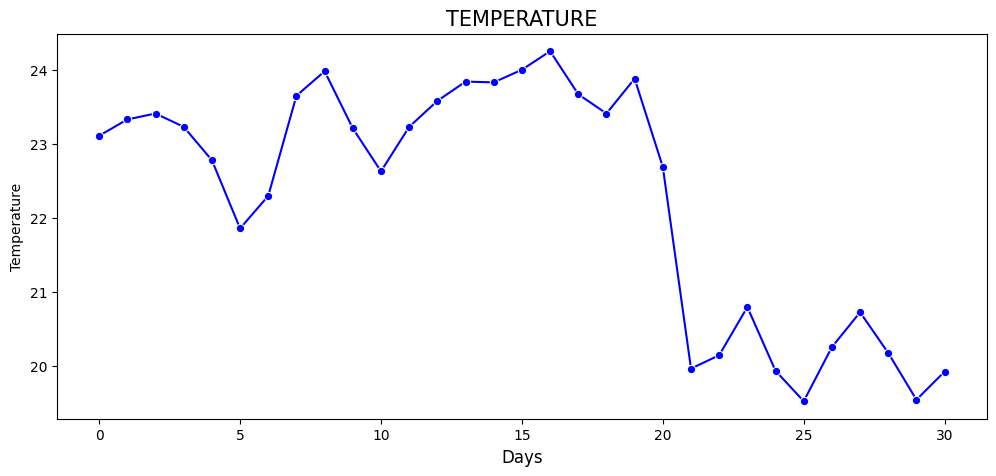

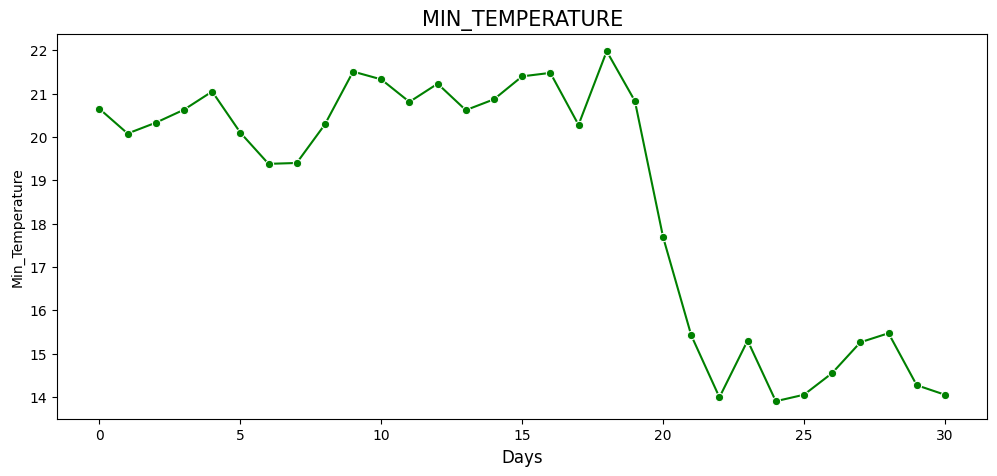

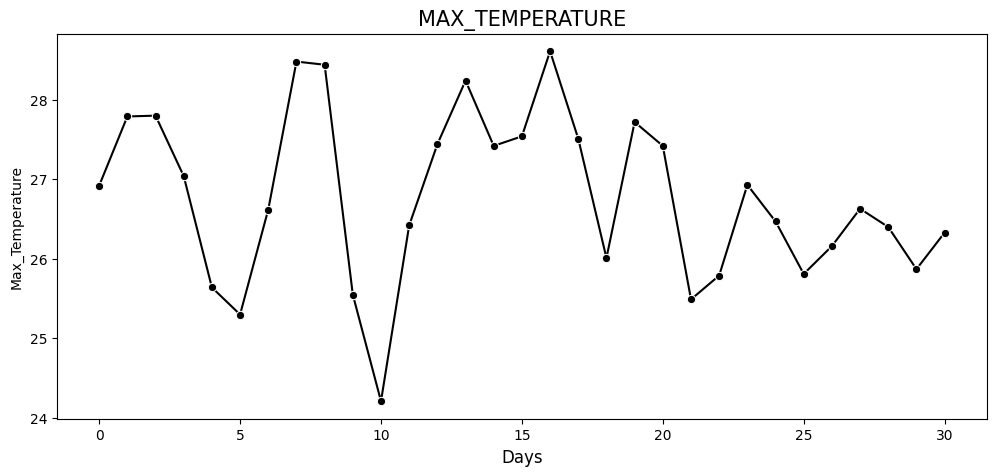

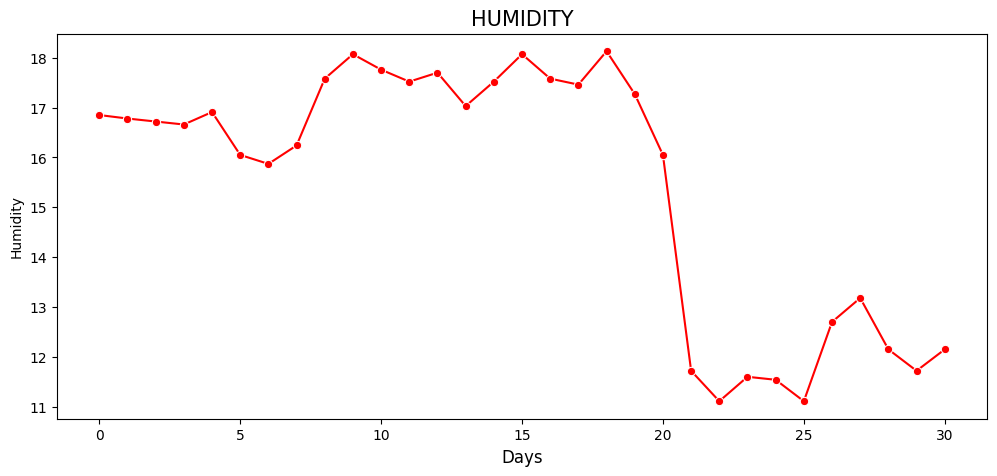

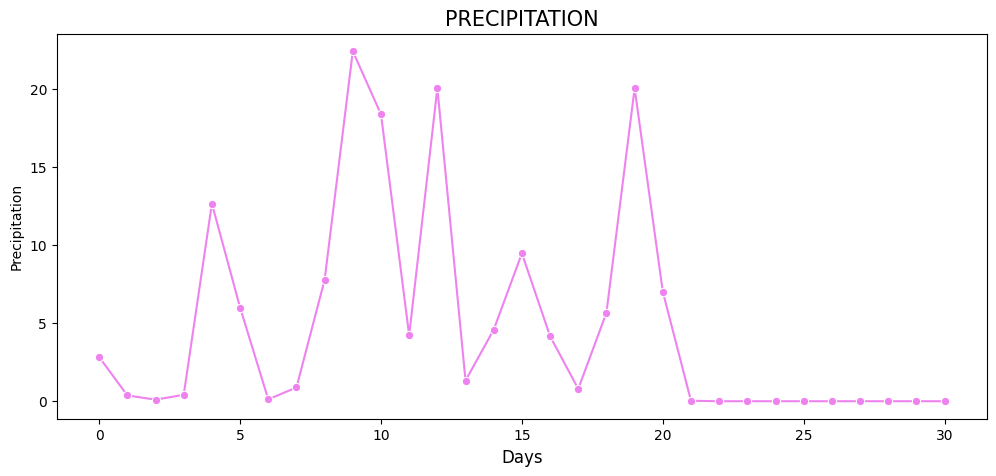

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


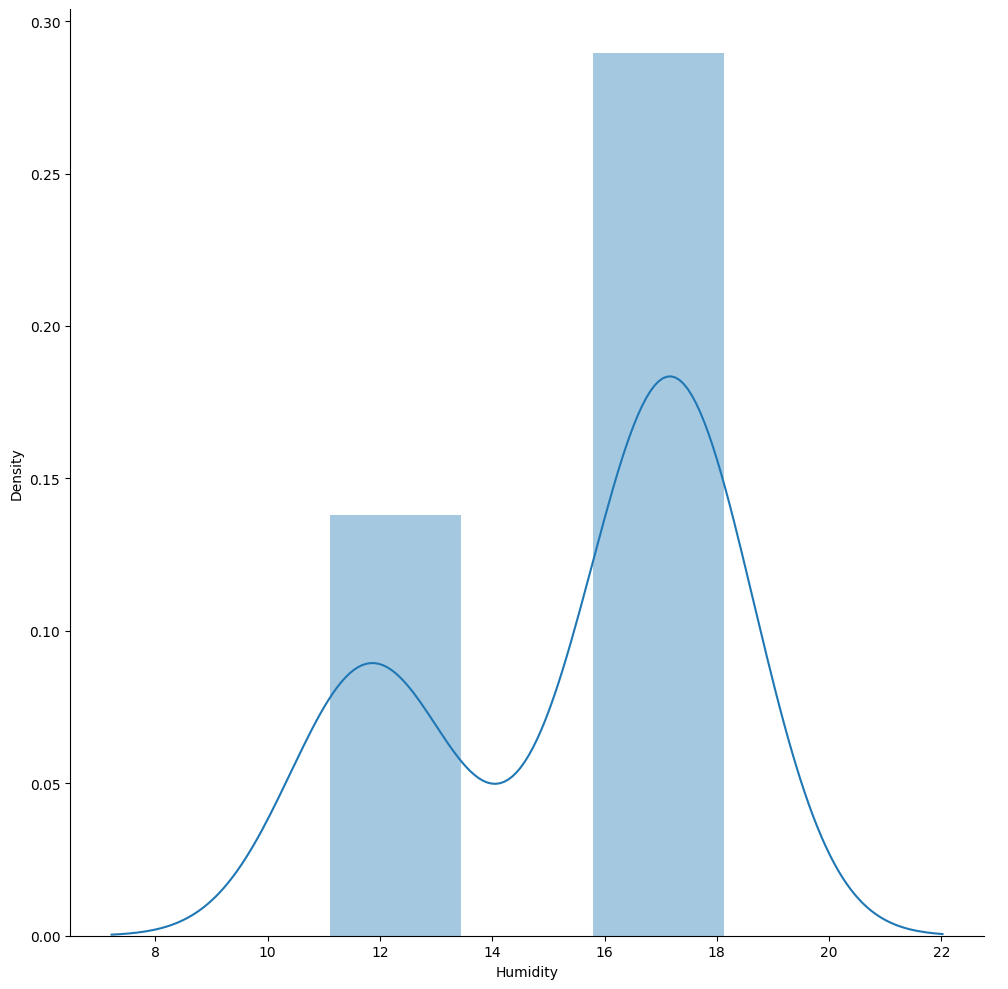

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

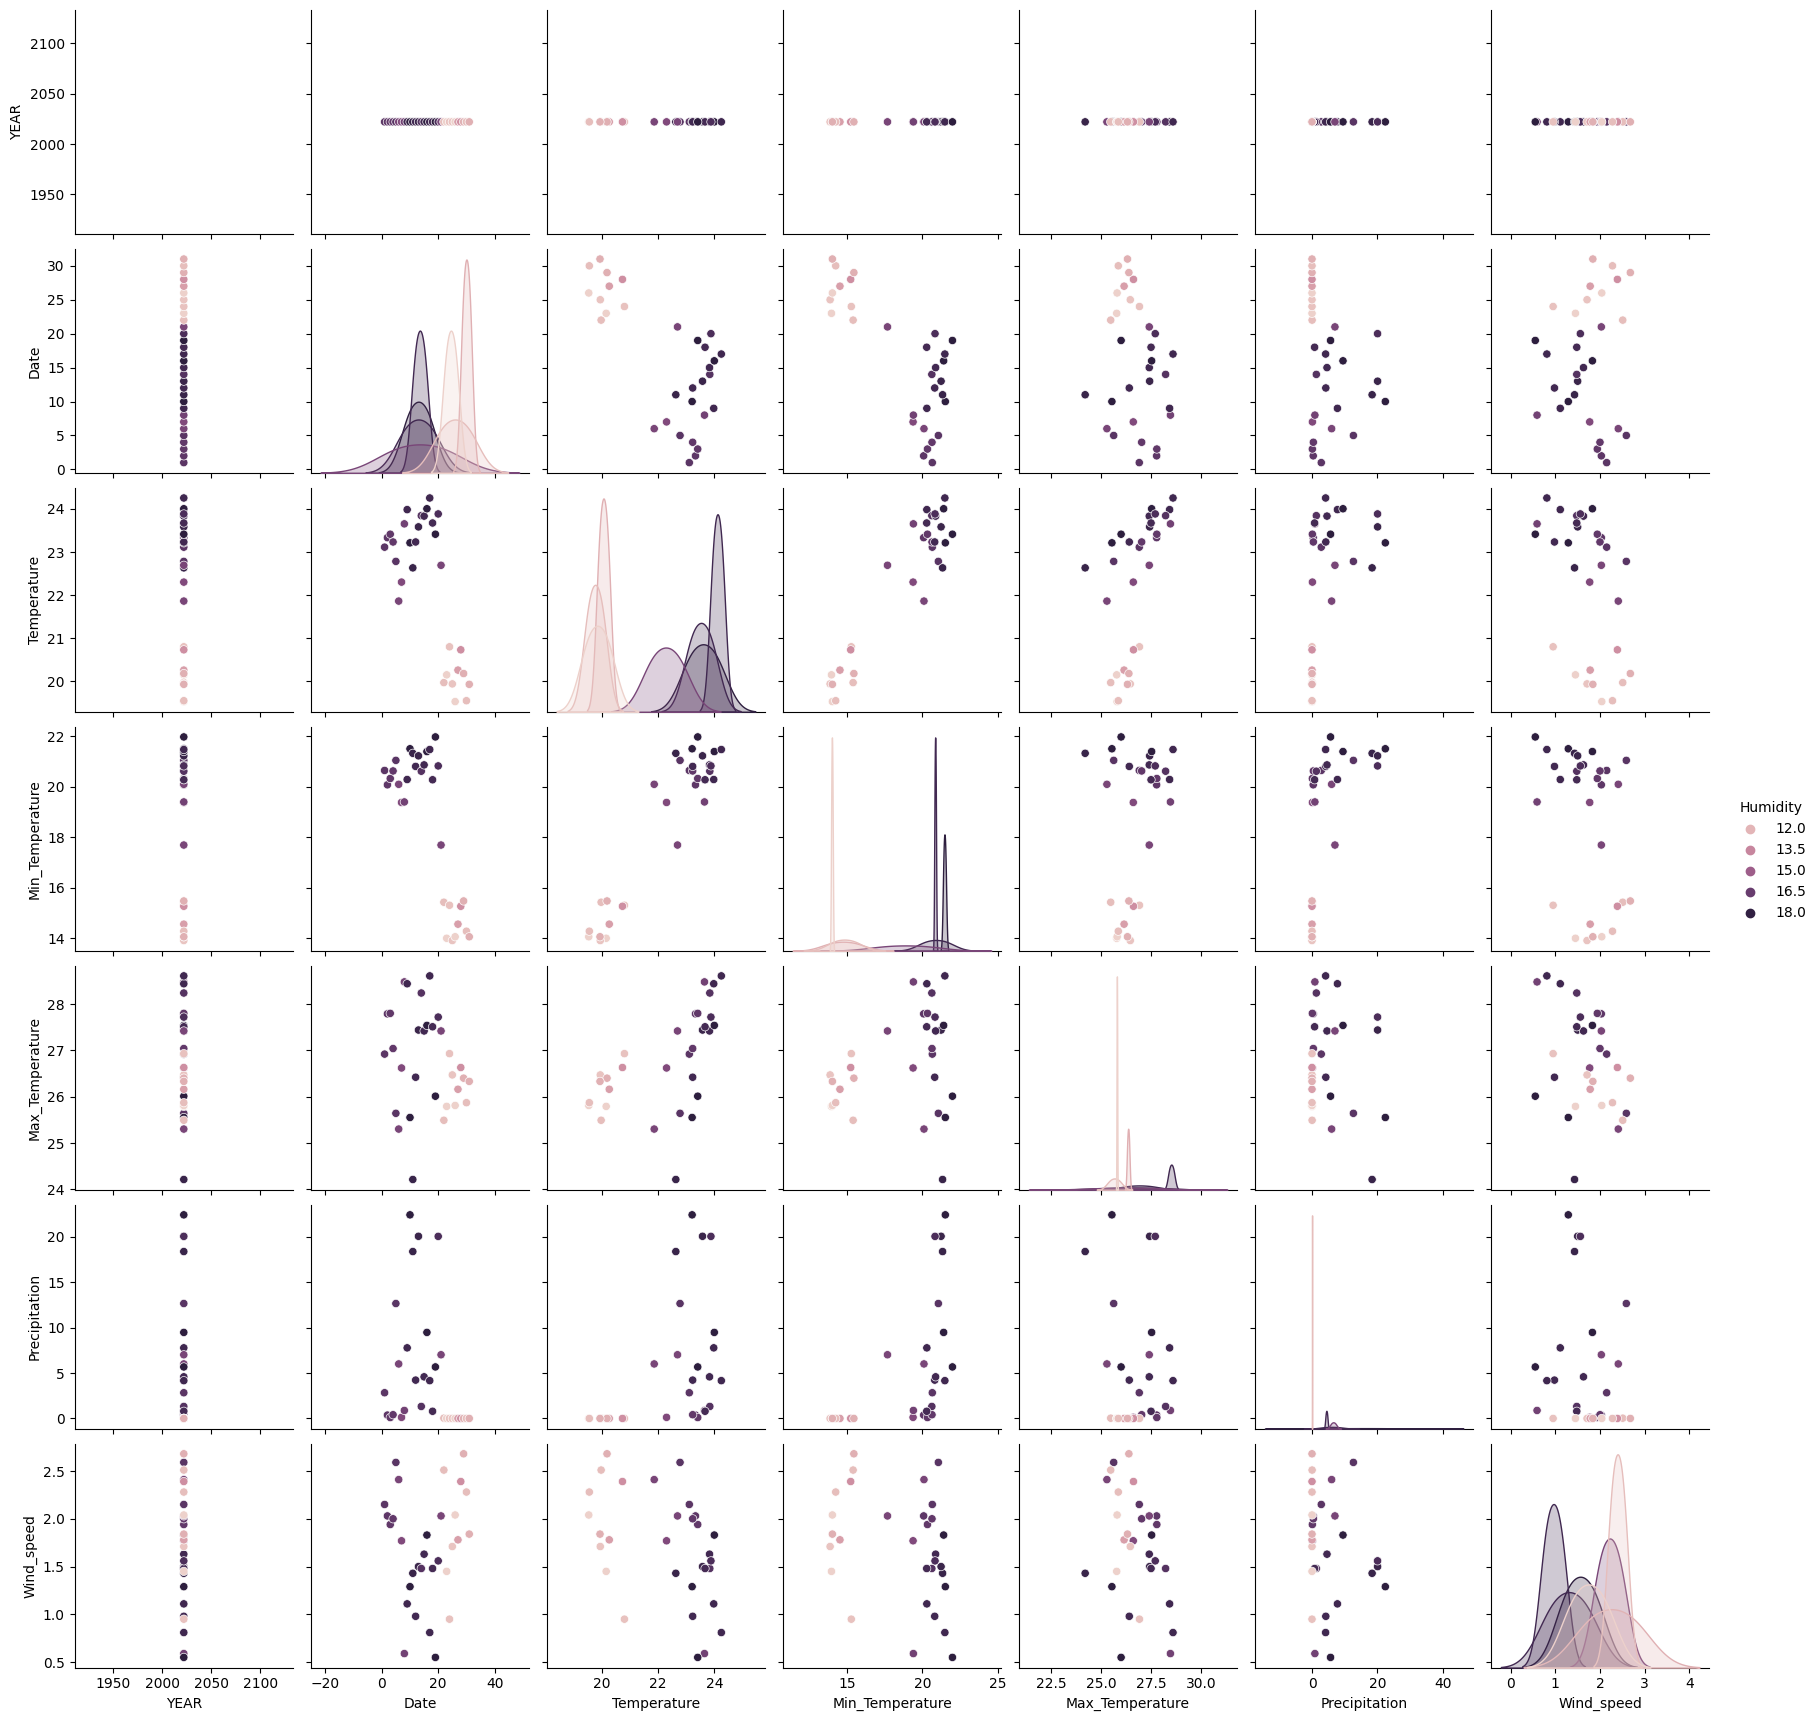

In [ ]:
sns.pairplot(data,hue="Humidity")

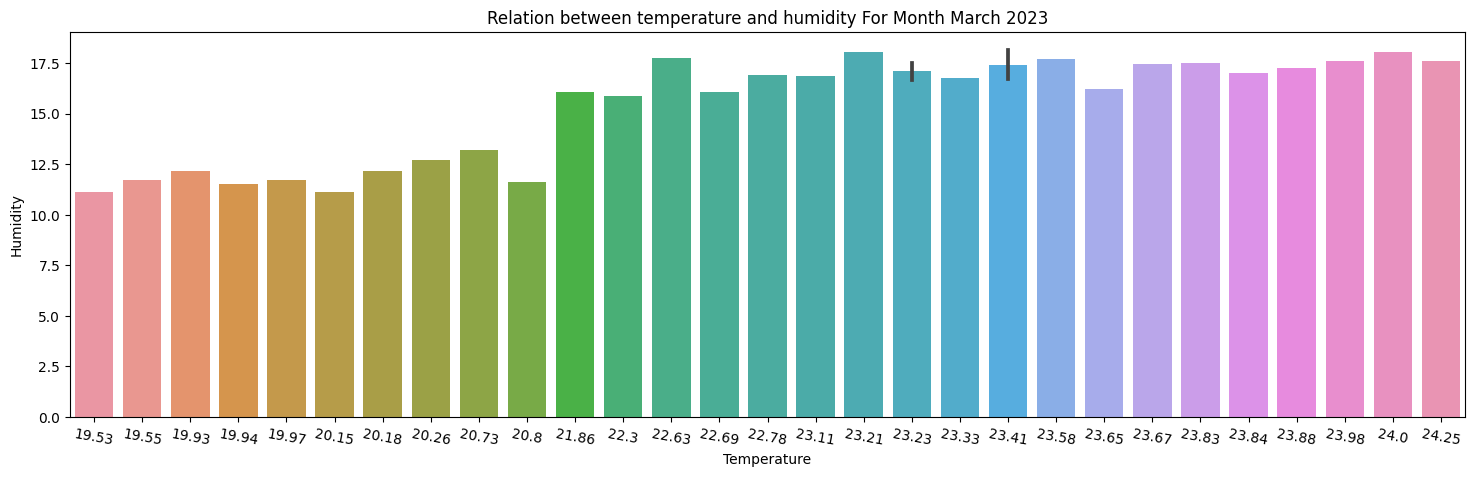

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

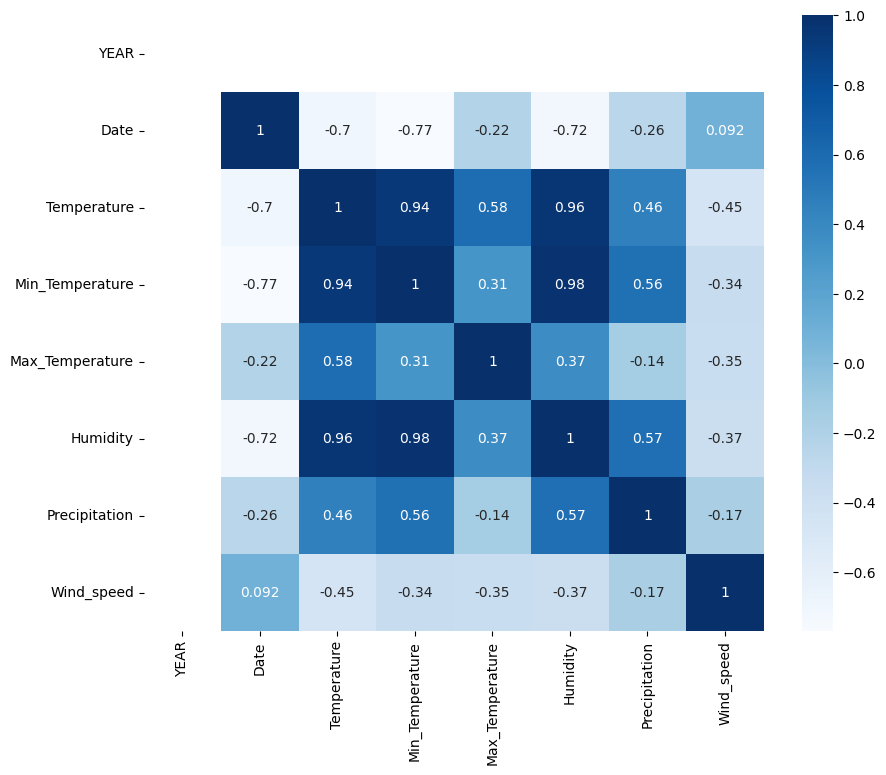

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

<Axes: ylabel='Date'>

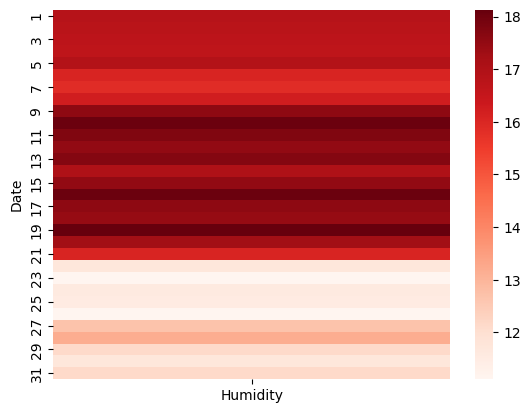

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

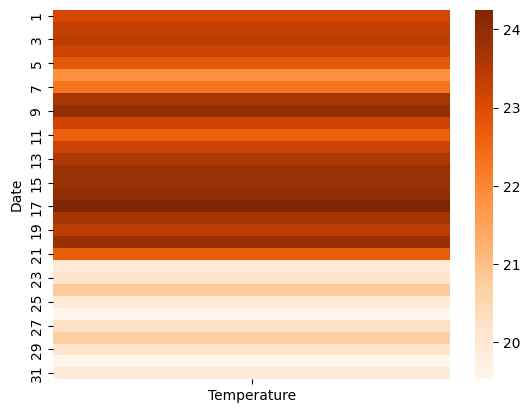

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,23.11,16.85,2.83,2.15
1,23.33,16.78,0.37,2.03
2,23.41,16.72,0.10,1.94
3,23.23,16.66,0.41,2.00
4,22.78,16.91,12.65,2.59
5,21.86,16.05,6.00,2.41
6,22.30,15.87,0.12,1.77
7,23.65,16.24,0.88,0.59
8,23.98,17.58,7.77,1.11
9,23.21,18.07,22.41,1.29


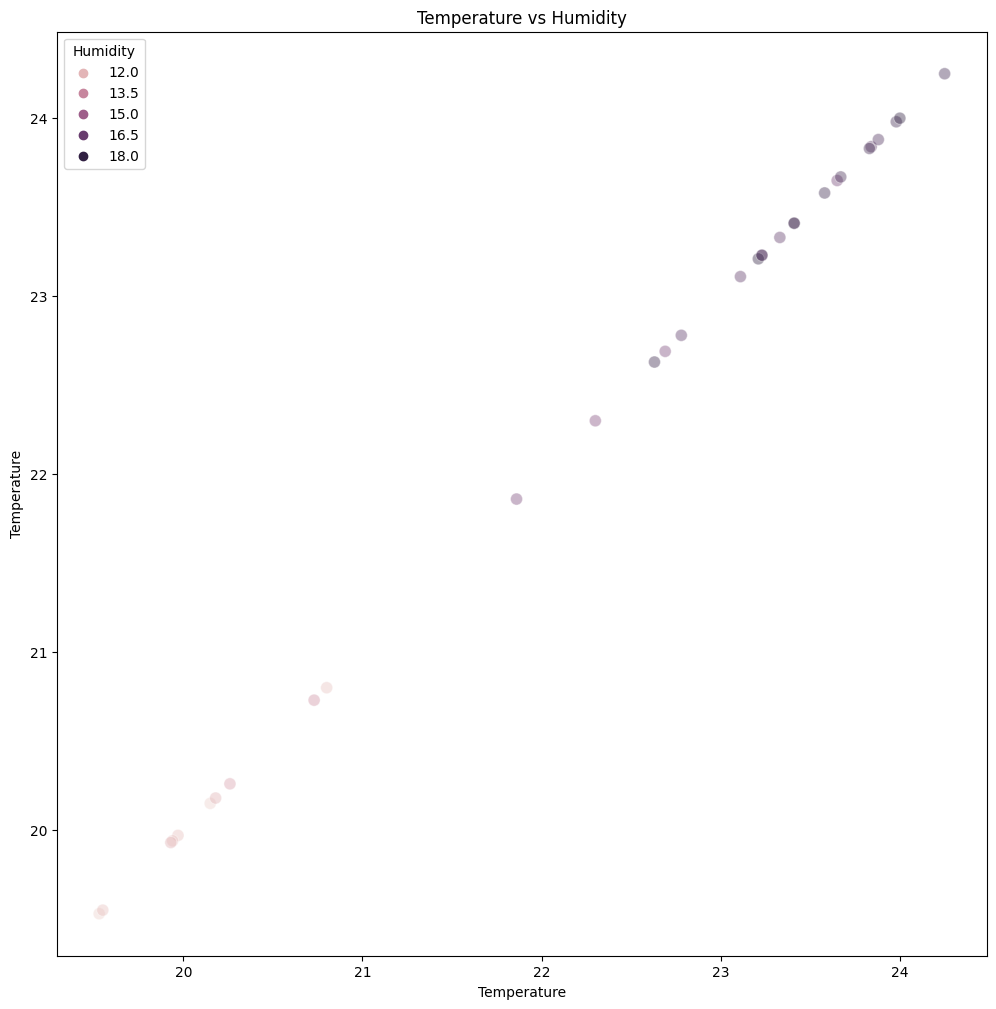

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

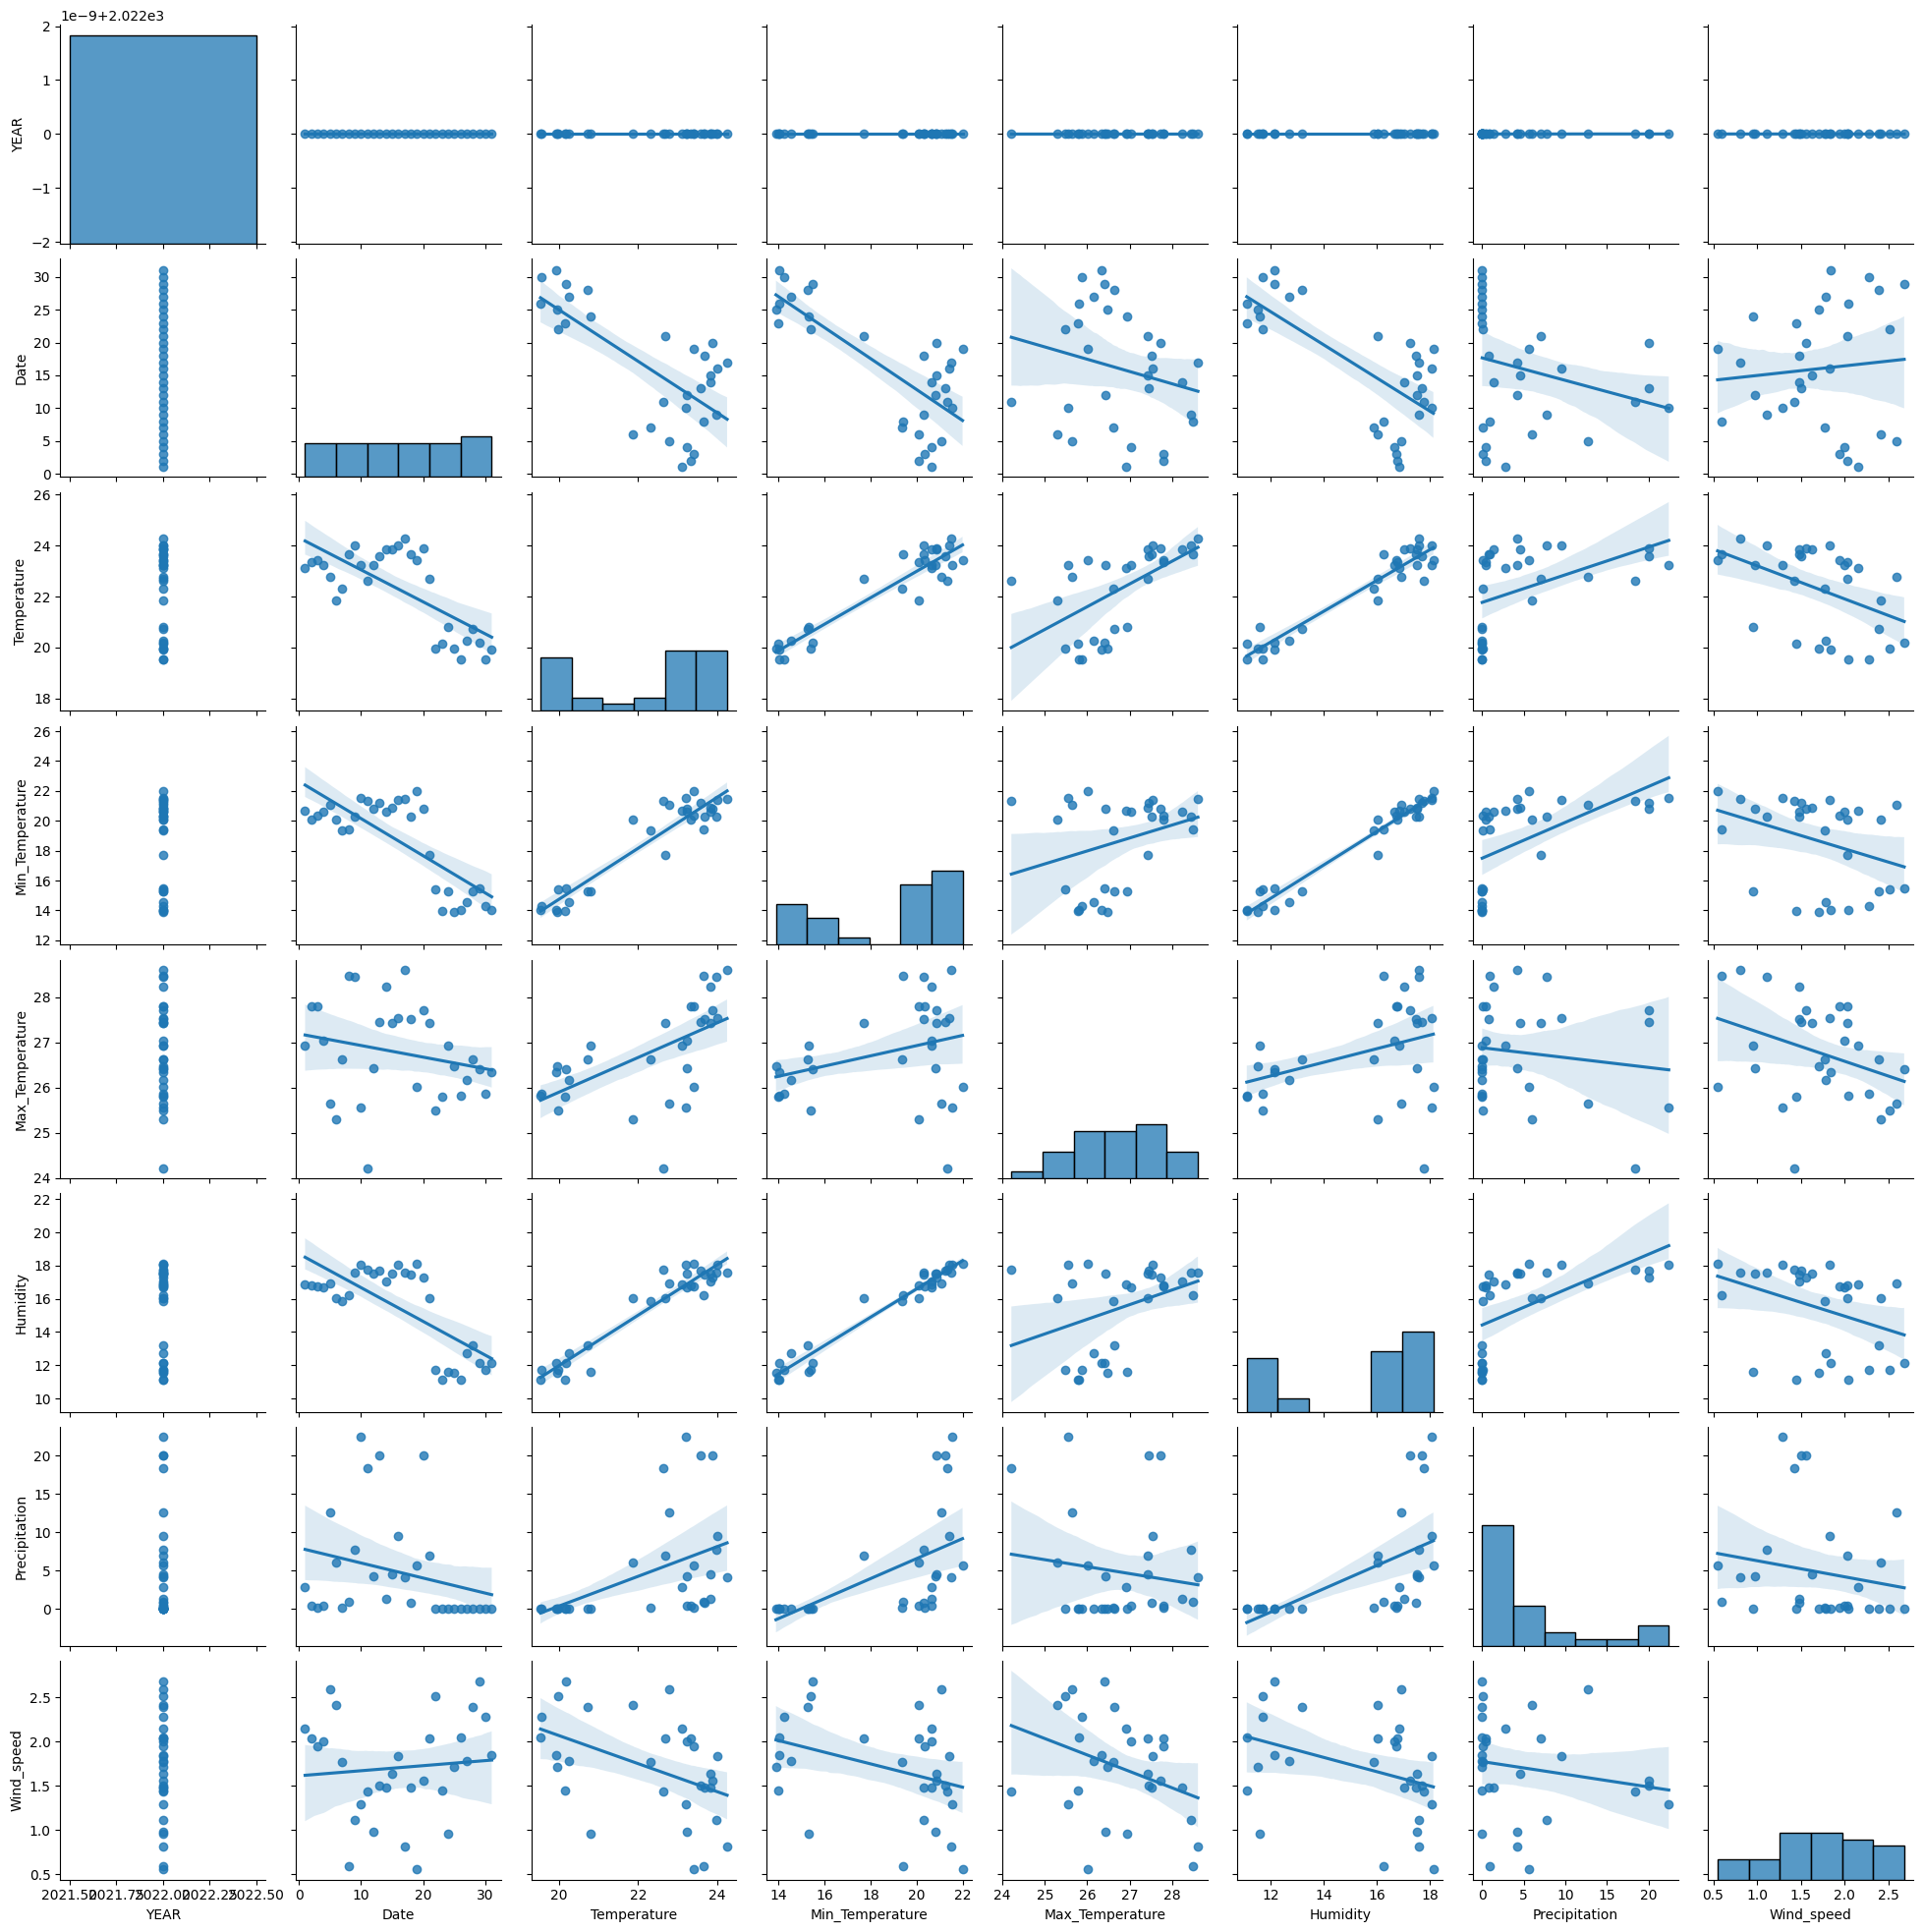

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

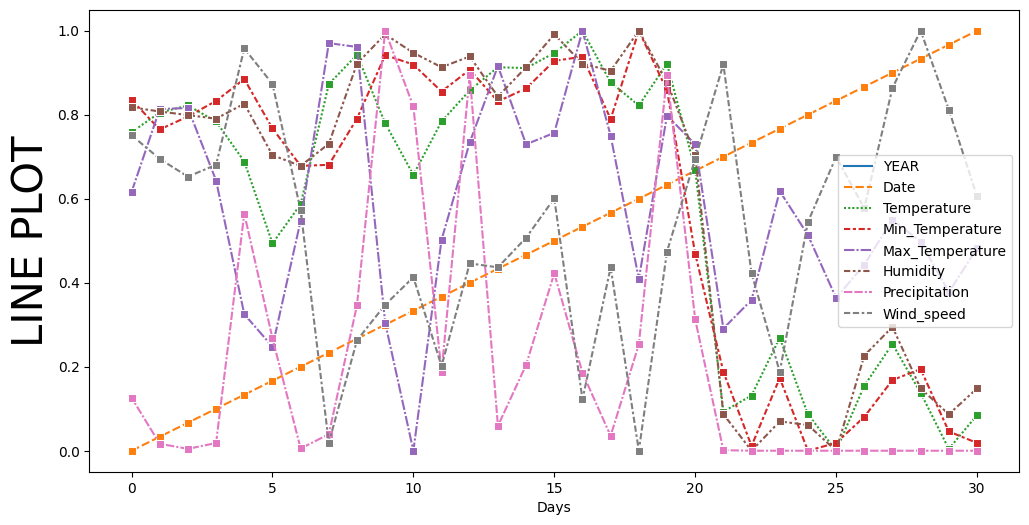

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

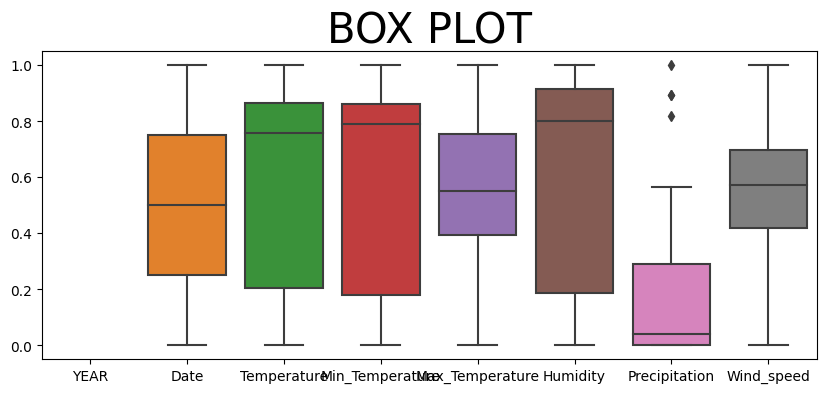

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

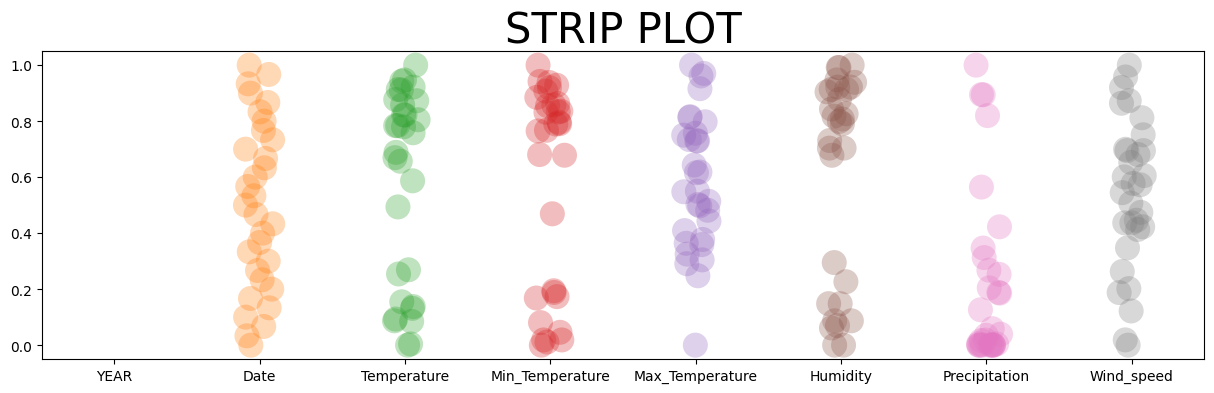

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()